## Matplotlib

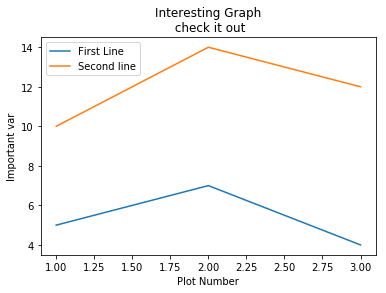

In [5]:
import matplotlib.pyplot as plt

x  = [1,2,3]
y  = [5,7,4]

x2 = [1,2,3]
y2 = [10,14,12]


plt.plot(x,y,label='First Line')
plt.plot(x2,y2, label='Second line')
plt.xlabel('Plot Number')
plt.ylabel('Important var')
plt.legend()
plt.title('Interesting Graph\n check it out')
plt.show()

## Bar Chart and Histogram

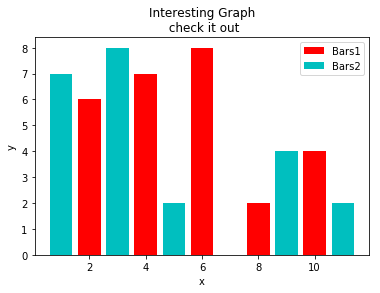

In [9]:
import matplotlib.pyplot as plt

x = [2,4,6,8,10]
y = [6,7,8,2,4]

x2 = [1,3,5,9,11]
y2 = [7,8,2,4,2]

plt.bar(x,y, label='Bars1', color='red')
plt.bar(x2,y2, label='Bars2', color='c')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interesting Graph\n check it out')
plt.show()

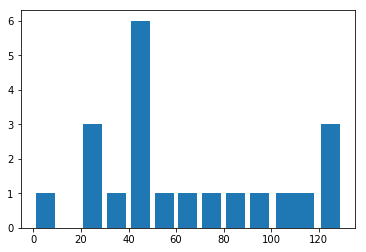

In [10]:
population_ages = [22,55,62,45,21,22,34,42,42,4,99,102,120,122,130,80,75,43,42,48]
ids = [x for x in range(len(population_ages))]


# histogram is used to show distribution
bins = [0,10,20,30,40,50,60,70,80,90,100,120,130]
plt.hist(population_ages, bins, histtype='bar', rwidth=0.8)
plt.show()

## Stack Plots

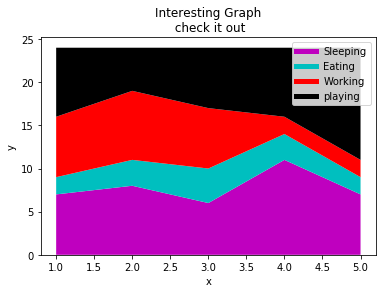

In [16]:
import matplotlib.pyplot as plt

days = [1,2,3,4,5]

sleeping = [7,8,6,11,7]
eating = [2,3,4,3,2]
working = [7,8,7,2,2]
playing = [8,5,7,8,13]

plt.plot([],[],color='m',label='Sleeping',lineWidth=5)
plt.plot([],[],color='c',label='Eating',lineWidth=5)
plt.plot([],[],color='r',label='Working',lineWidth=5)
plt.plot([],[],color='k',label='playing',lineWidth=5)
plt.stackplot(days, sleeping, eating, working, playing, colors=['m','c','r','k'])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interesting Graph\n check it out')
plt.show()

# Pie Charts

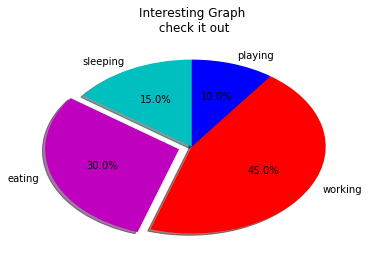

In [29]:
# they are like stack plot but they will show slice of time
import matplotlib.pyplot as plt

days = [1,2,3,4,5]

sleeping = [7,8,6,11,7]
eating = [2,3,4,3,2]
working = [7,8,7,2,2]
playing = [8,5,7,8,13]

slices = [15, 30, 45, 10]
activities = ['sleeping', 'eating', 'working', 'playing']
cols = ['c','m','r','b']
plt.pie(slices, labels=activities, colors=cols, startangle=90, shadow=True, 
        explode=(0,0.1,0,0),
        autopct='%1.1f%%')

# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
plt.title('Interesting Graph\n check it out')
plt.show()

# Loading data from files

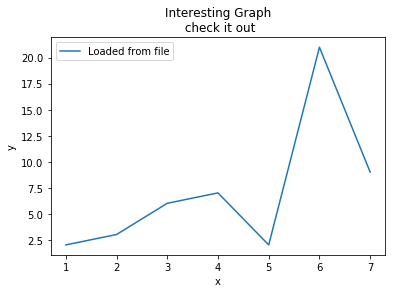

In [30]:
import matplotlib.pyplot as plt
import csv

x = []
y = []

with open('example','r') as csvFile:
    plots = csv.reader(csvFile, delimiter=',')
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))

plt.plot(x, y, label='Loaded from file')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interesting Graph\n check it out')
plt.show()

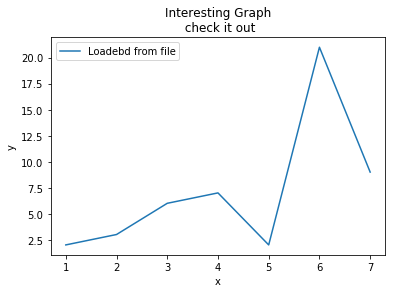

In [32]:
# part of reading a file
# unpack will append values into x and y lists
import numpy as np
x, y = np.loadtxt('example', delimiter = ',', unpack=True)
plt.plot(x, y, label='Loaded from file')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interesting Graph\n check it out')
plt.show()

# Getting data from internet

In [36]:
# we are using finance.yahoo API
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import matplotlib.dates as mdates

def bytespdate2num(fmt, encoding='utf=8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


def graph_data(stock):
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)
                
    # we can load the variable using np.loadtxt function
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                         delimiter = ',',
                                                         unpack=True,
                                                          # %Y = full year 2015
                                                          # %y = partial year 15
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = houres
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # %m-%d-%Y
                                                         converters={0:bytespdate2num('%Y%m%d')})
    plt.plot_date(date, closep, '-', label='Price' )
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.title('Interesting Graph\n check it out')
    plt.show()
    

graph_data('TSLA')
    
    


/home/amit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: loadtxt: Empty input file: "[]"


IndexError: list assignment index out of range